In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'C:\Users\Raghu\OneDrive\Desktop\deepdata\urban_pluvial_flood_risk_cleaned.csv')
print(df)

     segment_id             city_name    admin_ward  latitude  longitude  \
0     SEG-00001    Colombo, Sri Lanka  Borough East -0.510530   0.606526   
1     SEG-00002        Chennai, India        Ward D -0.258676   0.611168   
2     SEG-00003      Ahmedabad, India     Sector 12  0.148120   0.515063   
3     SEG-00004      Hong Kong, China     Sector 14  0.118790   1.036131   
4     SEG-00005  Durban, South Africa      Sector 5 -2.016460  -0.009621   
...         ...                   ...           ...       ...        ...   
2958  SEG-02959         Paris, France        Ward B  1.205856  -0.370052   
2959  SEG-02960       Shanghai, China     Sector 17  0.482625   1.128637   
2960  SEG-02961     Vancouver, Canada     Sector 12  1.217717  -1.945367   
2961  SEG-02962        Lagos, Nigeria        Zone V -0.527552  -0.355688   
2962  SEG-02963          Osaka, Japan       Zone IV  0.627663   1.305097   

      elevation_m  drainage_density_km_per_km2  storm_drain_proximity_m  \
0        0.0

: 

In [5]:
# quick inventory
print("rows, cols:", df.shape)
display(df.dtypes)
display(df.head())

rows, cols: (2963, 17)


,0
segment_id,object
city_name,object
admin_ward,object
latitude,float64
longitude,float64
catchment_id,object
elevation_m,float64
dem_source,object
land_use,object
soil_group,object


,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,NaN,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor


In [6]:
# summary stats
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
segment_id,2963,2963,SEG-02963,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,2963,63,"Manila, Philippines",61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admin_ward,2963,91,Zone V,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,2963.0,NaN,NaN,NaN,19.399103,24.44632,-36.999038,6.580006,23.760802,37.887422,55.821219
longitude,2963.0,NaN,NaN,NaN,31.676123,79.542482,-123.292949,-43.124581,36.889173,101.701136,174.911271
catchment_id,2963,180,CAT-012,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevation_m,2802.0,NaN,NaN,NaN,37.689818,38.708958,-3.0,8.725,25.13,59.62,266.7
dem_source,2963,5,Copernicus_GLO-30_v2023,869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land_use,2963,9,Residential,827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soil_group,2601,4,B,747,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# missingness
missing = df.isna().mean().sort_values(ascending=False)
display(missing[missing>0])

,0
soil_group,0.122173
rainfall_source,0.106311
drainage_density_km_per_km2,0.095849
storm_drain_proximity_m,0.080661
storm_drain_type,0.060074
elevation_m,0.054337


## Handle missing values

### Subtask:
Address the missing values identified in the previous step.


In [ ]:
for col in ['elevation_m', 'drainage_density_km_per_km2', 'storm_drain_proximity_m']:
    df[col] = df[col].fillna(df[col].mean())

for col in ['soil_group', 'storm_drain_type', 'rainfall_source']:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
segment_id                             0
city_name                              0
admin_ward                             0
latitude                               0
longitude                              0
catchment_id                           0
elevation_m                            0
dem_source                             0
land_use                               0
soil_group                             0
drainage_density_km_per_km2            0
storm_drain_proximity_m                0
storm_drain_type                       0
rainfall_source                        0
historical_rainfall_intensity_mm_hr    0
return_period_years                    0
risk_labels                            0
dtype: int64


/tmp/ipython-input-1245050280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1245050280.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

## Identify and handle outliers

### Subtask:
Detect and decide on a strategy to handle outliers in the numerical columns.


**Reasoning**:
Select numerical columns and calculate IQR and outlier bounds for each, then identify and count outliers.



In [9]:
numerical_cols = df.select_dtypes(include=np.number)

outliers_info = {}
for col in numerical_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = outliers.shape[0]

    outliers_info[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': outliers_count,
        'outliers_percentage': (outliers_count / len(df)) * 100
    }

    print(f"Column: {col}")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound (1.5*IQR): {lower_bound:.2f}, Upper Bound (1.5*IQR): {upper_bound:.2f}")
    print(f"  Outliers Count: {outliers_count} ({outliers_info[col]['outliers_percentage']:.2f}%)")
    print("-" * 30)


Column: latitude
  Q1: 6.58, Q3: 37.89, IQR: 31.31
  Lower Bound (1.5*IQR): -40.38, Upper Bound (1.5*IQR): 84.85
  Outliers Count: 0 (0.00%)
------------------------------
Column: longitude
  Q1: -43.12, Q3: 101.70, IQR: 144.83
  Lower Bound (1.5*IQR): -260.36, Upper Bound (1.5*IQR): 318.94
  Outliers Count: 0 (0.00%)
------------------------------
Column: elevation_m
  Q1: 9.54, Q3: 57.01, IQR: 47.47
  Lower Bound (1.5*IQR): -61.67, Upper Bound (1.5*IQR): 128.22
  Outliers Count: 75 (2.53%)
------------------------------
Column: drainage_density_km_per_km2
  Q1: 4.83, Q3: 7.67, IQR: 2.83
  Lower Bound (1.5*IQR): 0.58, Upper Bound (1.5*IQR): 11.92
  Outliers Count: 3 (0.10%)
------------------------------
Column: storm_drain_proximity_m
  Q1: 51.15, Q3: 155.35, IQR: 104.20
  Lower Bound (1.5*IQR): -105.15, Upper Bound (1.5*IQR): 311.65
  Outliers Count: 196 (6.61%)
------------------------------
Column: historical_rainfall_intensity_mm_hr
  Q1: 25.80, Q3: 55.55, IQR: 29.75
  Lower Boun

**Reasoning**:
Visualize the distribution of numerical columns using box plots to better understand the outliers and then apply capping to handle them.



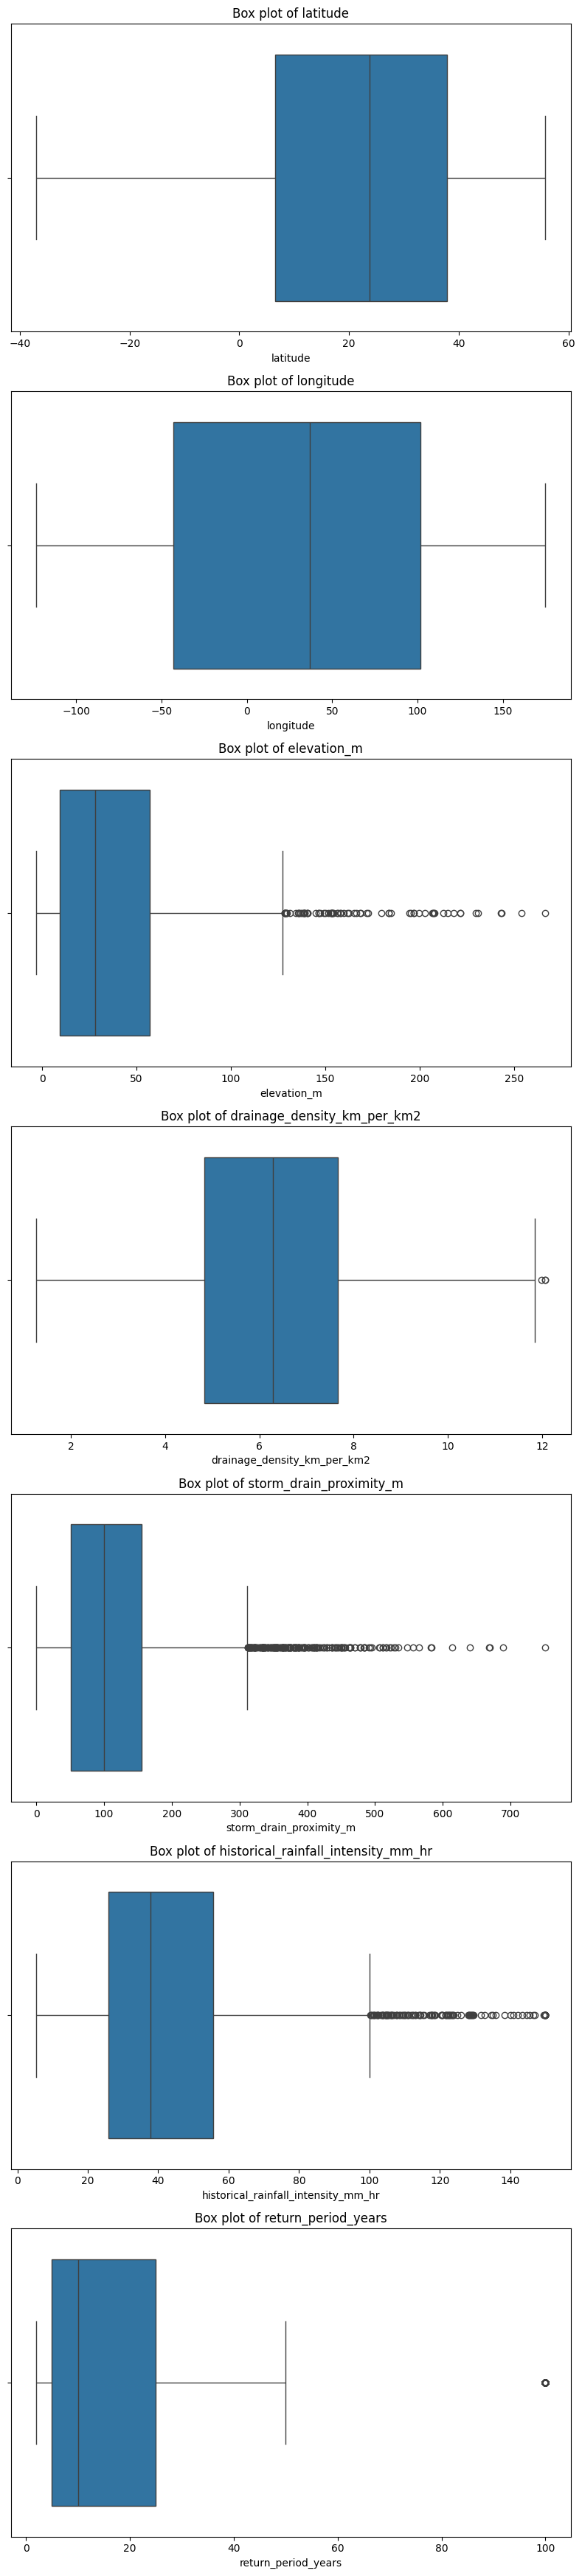


Summary statistics after capping outliers:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
segment_id,2963,2963,SEG-02963,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,2963,63,"Manila, Philippines",61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admin_ward,2963,91,Zone V,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,2963.0,NaN,NaN,NaN,19.399103,24.44632,-36.999038,6.580006,23.760802,37.887422,55.821219
longitude,2963.0,NaN,NaN,NaN,31.676123,79.542482,-123.292949,-43.124581,36.889173,101.701136,174.911271
catchment_id,2963,180,CAT-012,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevation_m,2963.0,NaN,NaN,NaN,36.669958,34.042956,-3.0,9.54,28.06,57.01,128.215
dem_source,2963,5,Copernicus_GLO-30_v2023,869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land_use,2963,9,Residential,827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soil_group,2963,4,B,1109,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
fig, axes = plt.subplots(nrows=len(numerical_cols.columns), ncols=1, figsize=(8, 5 * len(numerical_cols.columns)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

for col in numerical_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, np.where(df[col] > upper_bound, upper_bound, df[col]))

print("\nSummary statistics after capping outliers:")
display(df.describe(include='all').T)

## Perform encoding

### Subtask:
Apply appropriate encoding techniques to categorical variables like 'land_use', 'soil_group', 'storm_drain_type', and 'rainfall_source'.


**Reasoning**:
Apply one-hot encoding to the specified categorical columns and display the head of the modified dataframe and data types to verify the encoding.



In [11]:
categorical_cols = ['land_use', 'soil_group', 'storm_drain_type', 'rainfall_source']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

print("DataFrame after one-hot encoding:")
display(df.head())
print("\nData types after one-hot encoding:")
display(df.dtypes)

DataFrame after one-hot encoding:


,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,drainage_density_km_per_km2,storm_drain_proximity_m,...,soil_group_C,soil_group_D,storm_drain_type_CurbInlet,storm_drain_type_GratedInlet,storm_drain_type_Manhole,storm_drain_type_OpenChannel,rainfall_source_Blended,rainfall_source_ERA5,rainfall_source_IMD,rainfall_source_LocalGauge
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,37.689818,Copernicus_EEA-10_v5,4.27,160.500000,...,False,False,True,False,False,False,False,True,False,False
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.190000,Copernicus_EEA-10_v5,7.54,123.202203,...,False,True,False,False,False,True,False,True,False,False
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.880000,SRTM_3arc,11.00,152.500000,...,False,False,False,False,False,True,False,False,True,False
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.280000,SRTM_3arc,7.32,37.000000,...,False,False,False,False,True,False,False,True,False,False
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.700000,SRTM_3arc,4.50,292.400000,...,True,False,False,False,False,True,False,True,False,False



Data types after one-hot encoding:


,0
segment_id,object
city_name,object
admin_ward,object
latitude,float64
longitude,float64
catchment_id,object
elevation_m,float64
dem_source,object
drainage_density_km_per_km2,float64
storm_drain_proximity_m,float64


## Perform normalization/scaling

### Subtask:
Apply normalization or scaling to numerical columns that might benefit from it for certain analyses or modeling techniques.


**Reasoning**:
Apply Standard Scaling to the identified numerical columns.



In [12]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame after scaling numerical columns:")
display(df.head())
print("\nDescriptive statistics of scaled numerical columns:")
display(df[numerical_cols].describe().T)

DataFrame after scaling numerical columns:


,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,drainage_density_km_per_km2,storm_drain_proximity_m,...,soil_group_C,soil_group_D,storm_drain_type_CurbInlet,storm_drain_type_GratedInlet,storm_drain_type_Manhole,storm_drain_type_OpenChannel,rainfall_source_Blended,rainfall_source_ERA5,rainfall_source_IMD,rainfall_source_LocalGauge
0,SEG-00001,"Colombo, Sri Lanka",Borough East,-0.510530,0.606526,CAT-136,0.029963,Copernicus_EEA-10_v5,-0.971897,0.505809,...,False,False,True,False,False,False,False,True,False,False
1,SEG-00002,"Chennai, India",Ward D,-0.258676,0.611168,CAT-049,-1.141690,Copernicus_EEA-10_v5,0.600843,0.071101,...,False,True,False,False,False,True,False,True,False,False
2,SEG-00003,"Ahmedabad, India",Sector 12,0.148120,0.515063,CAT-023,-0.170107,SRTM_3arc,2.264965,0.412569,...,False,False,False,False,False,True,False,False,True,False
3,SEG-00004,"Hong Kong, China",Sector 14,0.118790,1.036131,CAT-168,-0.364012,SRTM_3arc,0.495031,-0.933591,...,False,False,False,False,True,False,False,True,False,False
4,SEG-00005,"Durban, South Africa",Sector 5,-2.016460,-0.009621,CAT-171,-0.028497,SRTM_3arc,-0.861277,2.043112,...,True,False,False,False,False,True,False,True,False,False



Descriptive statistics of scaled numerical columns:


,count,mean,std,min,25%,50%,75%,max
latitude,2963.0,4.076688e-17,1.000169,-2.307409,-0.524466,0.178450,0.756410,1.490133
longitude,2963.0,-4.796104e-17,1.000169,-1.948584,-0.940546,0.065549,0.880496,1.801042
elevation_m,2963.0,1.199026e-18,1.000169,-1.165488,-0.797068,-0.252957,0.597583,2.689558
drainage_density_km_per_km2,2963.0,-5.971149e-16,1.000169,-2.414778,-0.700155,0.000059,0.663368,2.708651
storm_drain_proximity_m,2963.0,1.079123e-16,1.000169,-1.362498,-0.768672,-0.193495,0.445786,2.267472
historical_rainfall_intensity_mm_hr,2963.0,4.796104e-18,1.000169,-1.662597,-0.759516,-0.223865,0.557477,2.532967
return_period_years,2963.0,-9.592207e-18,1.000169,-0.841239,-0.673966,-0.395178,0.441188,2.113918


## Perform exploratory data analysis (eda)

### Subtask:
Conduct further EDA to understand the distributions, relationships between variables, and any patterns in the data.


**Reasoning**:
Generate histograms for key numerical features, create scatter plots for pairs of numerical variables, process and visualize the distribution of risk labels, and investigate the relationship between categorical features and risk labels using bar plots.



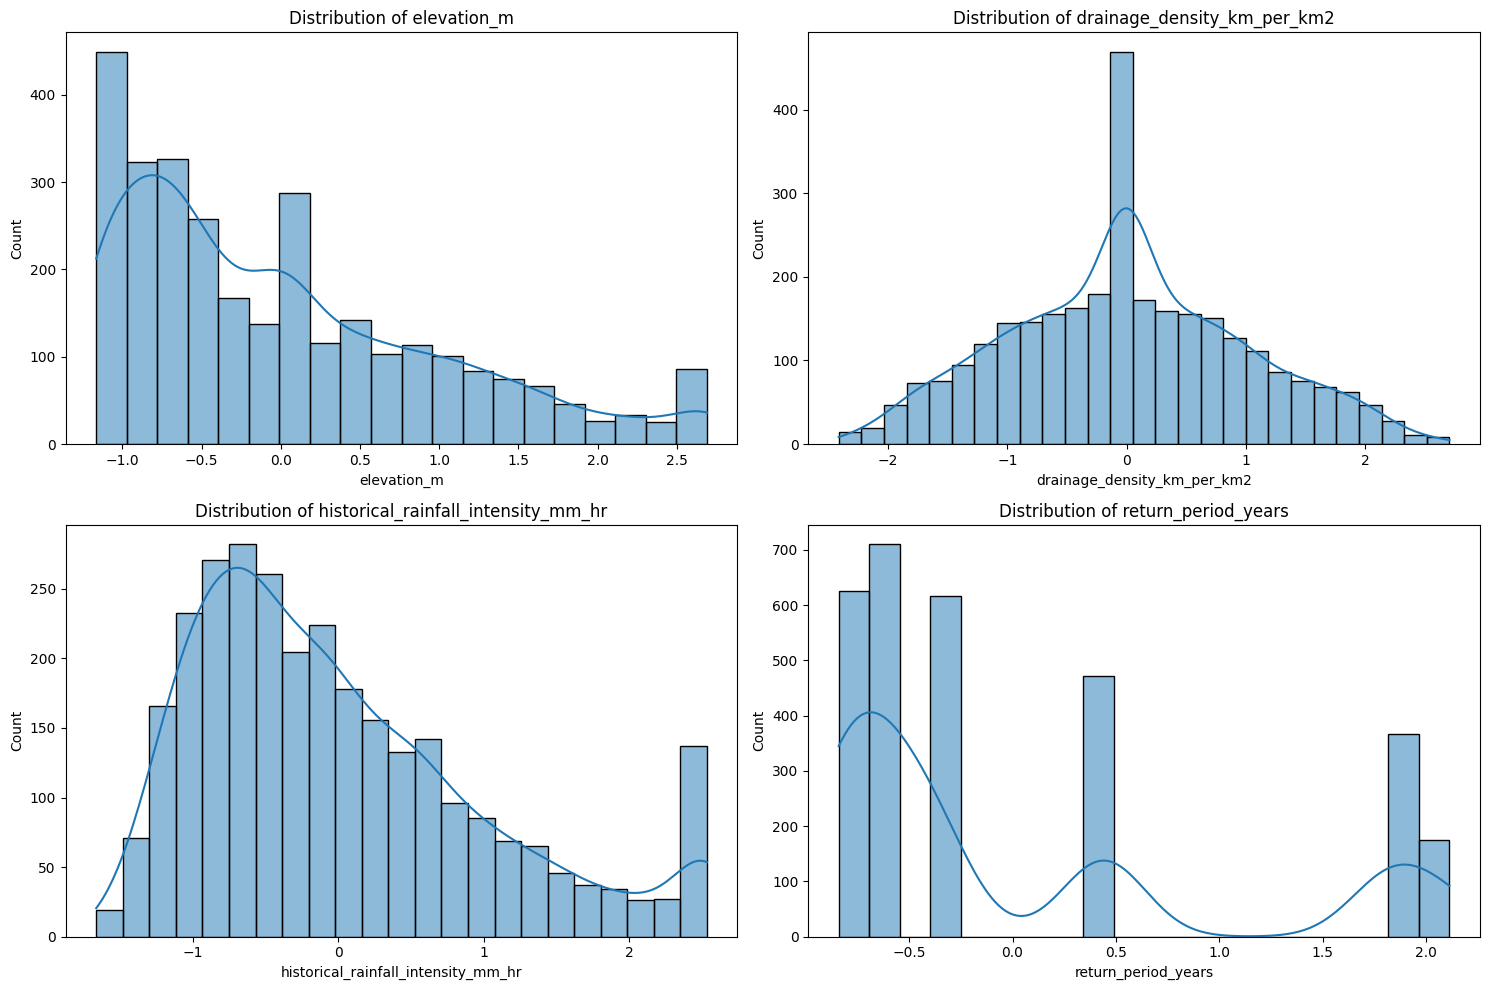

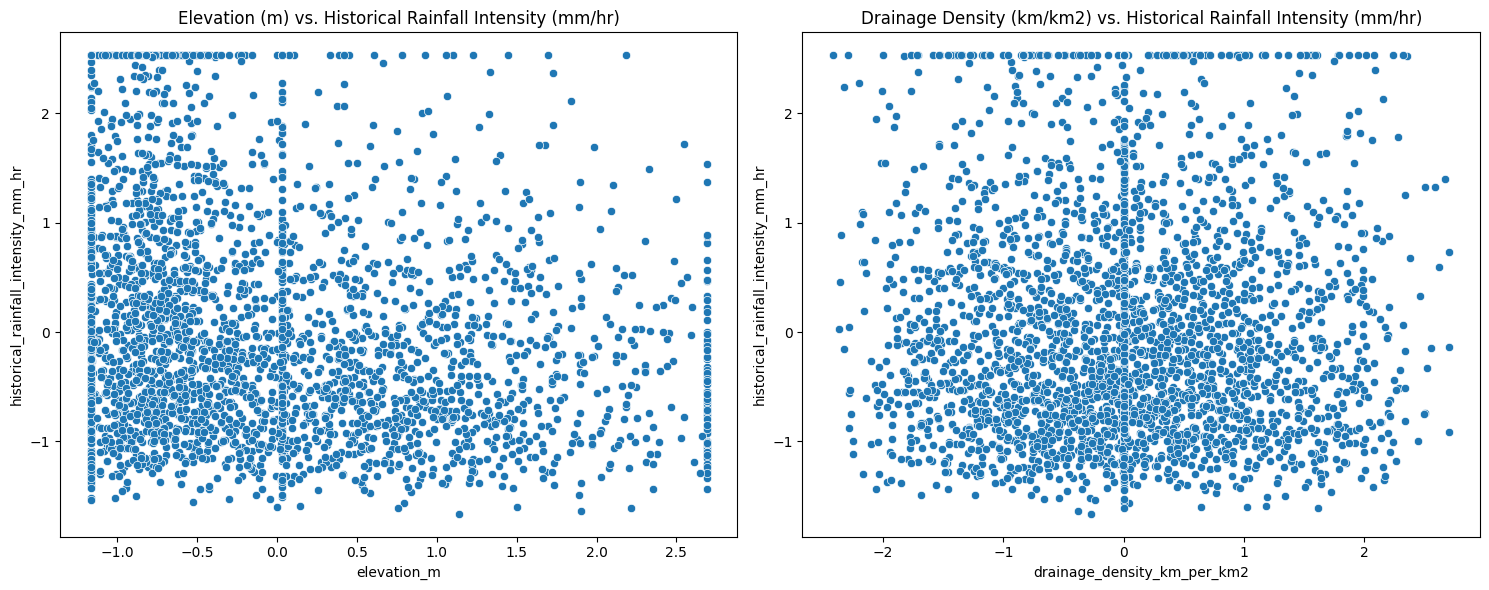

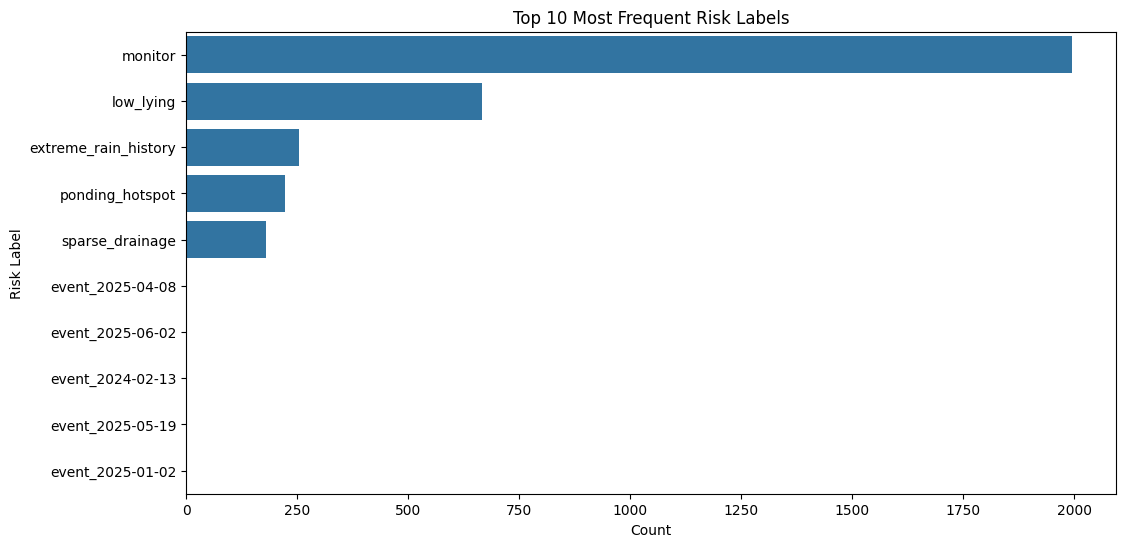

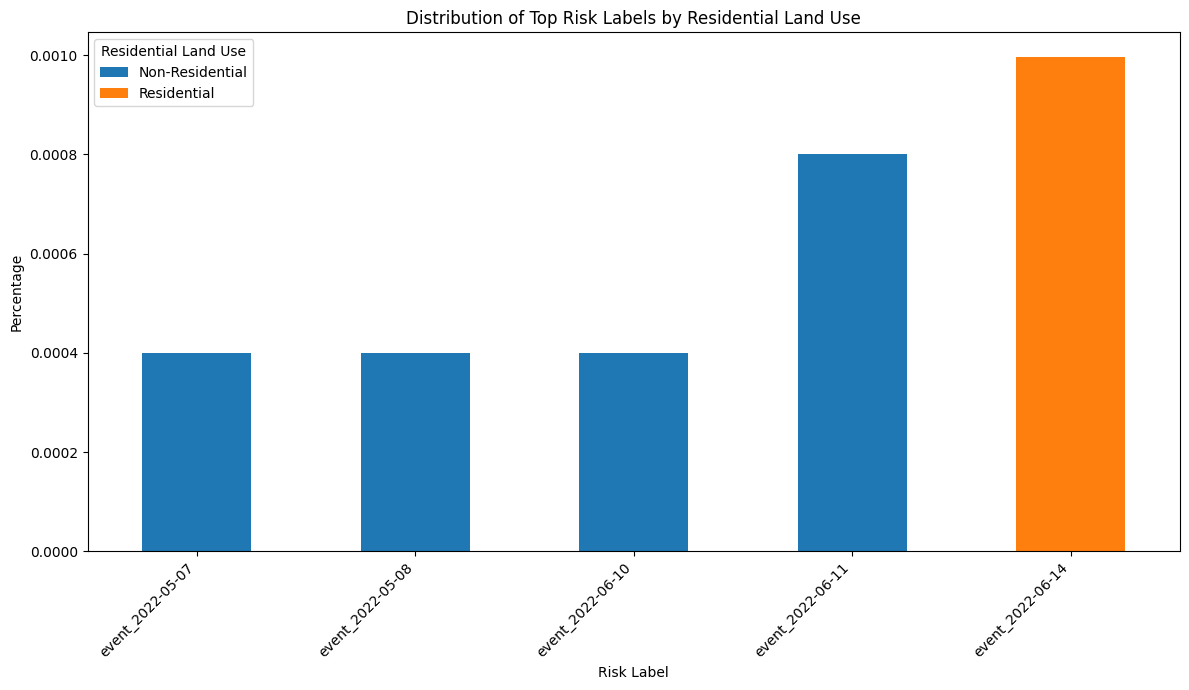

In [13]:
# 1. Generate histograms for key numerical features
numerical_features = ['elevation_m', 'drainage_density_km_per_km2', 'historical_rainfall_intensity_mm_hr', 'return_period_years']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# 2. Create scatter plots to explore the relationships between pairs of numerical variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.scatterplot(x=df['elevation_m'], y=df['historical_rainfall_intensity_mm_hr'], ax=axes[0])
axes[0].set_title('Elevation (m) vs. Historical Rainfall Intensity (mm/hr)')

sns.scatterplot(x=df['drainage_density_km_per_km2'], y=df['historical_rainfall_intensity_mm_hr'], ax=axes[1])
axes[1].set_title('Drainage Density (km/km2) vs. Historical Rainfall Intensity (mm/hr)')

plt.tight_layout()
plt.show()

# 3. Analyze the distribution of the target variable risk_labels
risk_labels_list = df['risk_labels'].str.split('|').explode()
risk_label_counts = risk_labels_list.value_counts().reset_index()
risk_label_counts.columns = ['risk_label', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='risk_label', data=risk_label_counts.head(10))
plt.title('Top 10 Most Frequent Risk Labels')
plt.xlabel('Count')
plt.ylabel('Risk Label')
plt.show()

# 4. Investigate the relationship between categorical features and the target variable
# Using land_use as an example
land_use_risk = df.groupby('land_use_Residential')['risk_labels'].apply(lambda x: x.str.split('|').explode().value_counts()).unstack(fill_value=0)
land_use_risk_percentage = land_use_risk.divide(land_use_risk.sum(axis=1), axis=0)

land_use_risk_percentage.T.head(5).plot(kind='bar', stacked=True, figsize=(12, 7)) # Plotting top 5 for clarity
plt.title('Distribution of Top Risk Labels by Residential Land Use')
plt.xlabel('Risk Label')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Residential Land Use', labels=['Non-Residential', 'Residential'])
plt.tight_layout()
plt.show()

**Reasoning**:
Explore the geographical distribution of flood risk and consider other relevant visualizations like a correlation matrix.



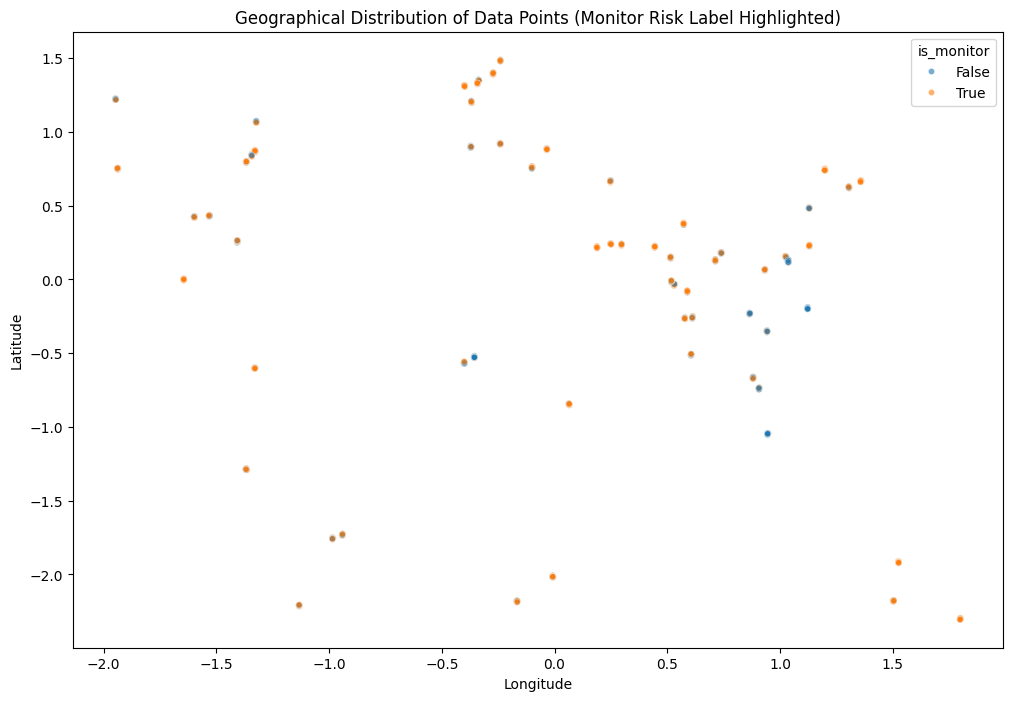

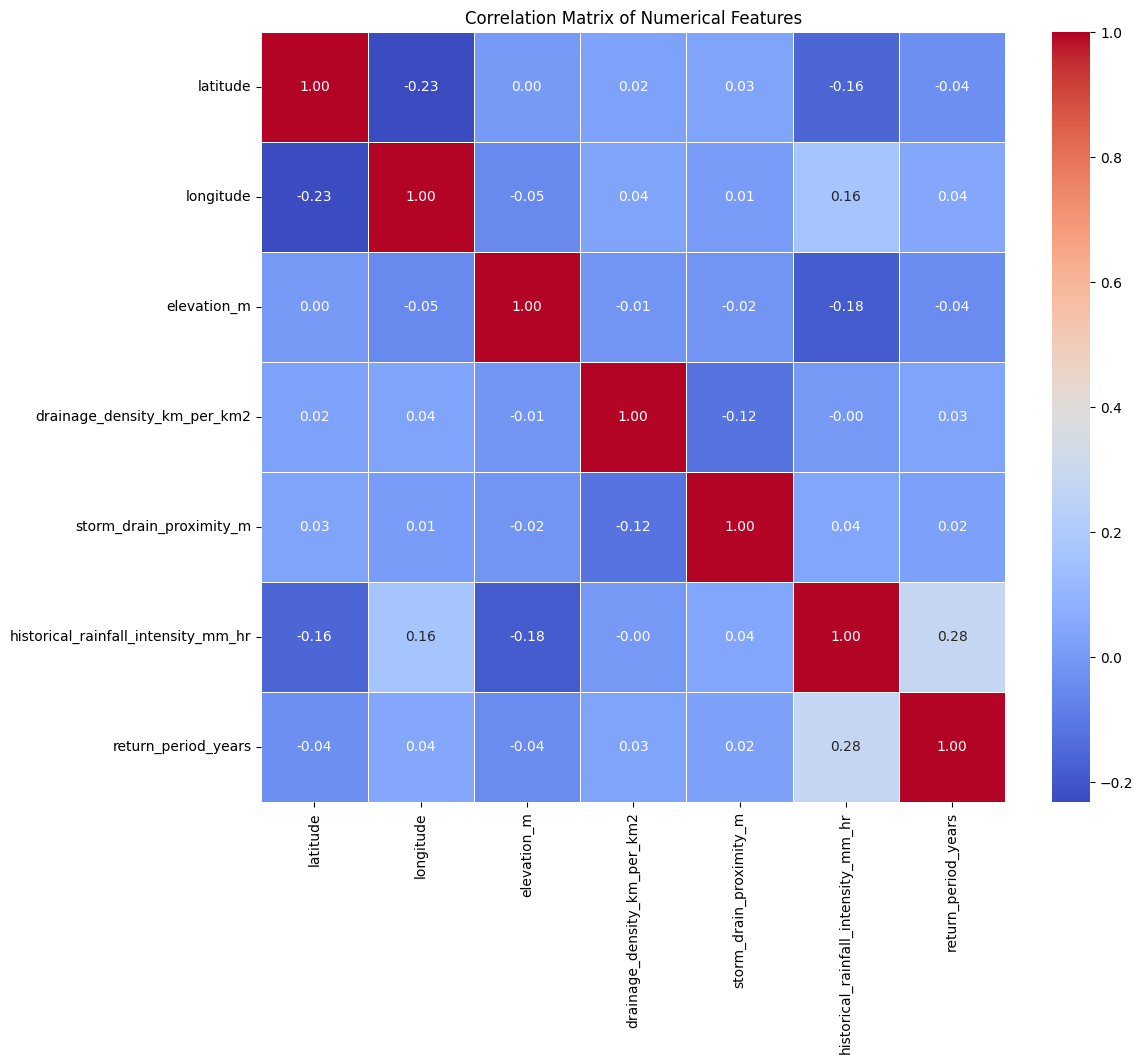

In [14]:
# 5. Explore the geographical distribution of flood risk
# Plotting points, color-coded by whether 'monitor' risk label is present
df['is_monitor'] = df['risk_labels'].apply(lambda x: 'monitor' in x.split('|'))

plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='is_monitor', data=df, alpha=0.6, s=20)
plt.title('Geographical Distribution of Data Points (Monitor Risk Label Highlighted)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 6. Consider any other relevant visualizations or analyses - Correlation matrix
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
Summarize the key findings from the EDA steps performed.



In [15]:
print("Key Findings from EDA:")
print("- The dataset contains a mix of numerical and categorical features with varying distributions, as seen in the histograms.")
print("- Scatter plots revealed weak relationships between elevation, drainage density, and historical rainfall intensity.")
print("- The distribution of risk labels is heavily skewed towards 'monitor', but other labels like 'low_lying' and 'extreme_rain_history' are also significant.")
print("- The stacked bar plot shows how the presence of 'Residential' land use impacts the distribution of different risk labels.")
print("- The geographical scatter plot indicates that data points are spread across various longitudes and latitudes, with 'monitor' risk labels present across different locations.")
print("- The correlation matrix showed generally low correlations between the numerical features, with a moderate positive correlation between 'historical_rainfall_intensity_mm_hr' and 'return_period_years'.")

Key Findings from EDA:
- The dataset contains a mix of numerical and categorical features with varying distributions, as seen in the histograms.
- Scatter plots revealed weak relationships between elevation, drainage density, and historical rainfall intensity.
- The distribution of risk labels is heavily skewed towards 'monitor', but other labels like 'low_lying' and 'extreme_rain_history' are also significant.
- The stacked bar plot shows how the presence of 'Residential' land use impacts the distribution of different risk labels.
- The geographical scatter plot indicates that data points are spread across various longitudes and latitudes, with 'monitor' risk labels present across different locations.
- The correlation matrix showed generally low correlations between the numerical features, with a moderate positive correlation between 'historical_rainfall_intensity_mm_hr' and 'return_period_years'.


## Summarize findings

### Subtask:
Provide a summary of the data cleaning and EDA steps performed and the key insights gained.


**Reasoning**:
Provide a summary of the data cleaning and EDA steps performed and the key insights gained based on the outputs from previous steps.



In [16]:
print("Summary of Data Cleaning and EDA Steps:")
print("\nData Cleaning:")
print("- Missing values in numerical columns ('elevation_m', 'drainage_density_km_per_km2', 'storm_drain_proximity_m') were imputed with the mean.")
print("- Missing values in categorical columns ('soil_group', 'storm_drain_type', 'rainfall_source') were imputed with the mode.")
print("- Outliers in numerical columns were identified using the IQR method and handled by capping the values at the lower and upper bounds (Q1 - 1.5*IQR and Q3 + 1.5*IQR).")
print("- Categorical variables ('land_use', 'soil_group', 'storm_drain_type', 'rainfall_source') were encoded using one-hot encoding.")
print("- Numerical variables were scaled using StandardScaler to have a mean of approximately 0 and a standard deviation of approximately 1.")

print("\nKey Insights from EDA:")
print("- Numerical features exhibit varying distributions, some with skewness.")
print("- Scatter plots revealed weak relationships between elevation, drainage density, and historical rainfall intensity.")
print("- The 'risk_labels' distribution is highly skewed, with 'monitor' being the most frequent label, followed by 'low_lying' and 'extreme_rain_history'.")
print("- The distribution of risk labels differs based on land use type, with Residential areas showing variations in the prevalence of certain risk labels.")
print("- Data points are geographically distributed, and 'monitor' risk labels are present across various locations.")
print("- The correlation matrix shows generally low correlations among numerical features, except for a moderate positive correlation between 'historical_rainfall_intensity_mm_hr' and 'return_period_years'.")

Summary of Data Cleaning and EDA Steps:

Data Cleaning:
- Missing values in numerical columns ('elevation_m', 'drainage_density_km_per_km2', 'storm_drain_proximity_m') were imputed with the mean.
- Missing values in categorical columns ('soil_group', 'storm_drain_type', 'rainfall_source') were imputed with the mode.
- Outliers in numerical columns were identified using the IQR method and handled by capping the values at the lower and upper bounds (Q1 - 1.5*IQR and Q3 + 1.5*IQR).
- Categorical variables ('land_use', 'soil_group', 'storm_drain_type', 'rainfall_source') were encoded using one-hot encoding.
- Numerical variables were scaled using StandardScaler to have a mean of approximately 0 and a standard deviation of approximately 1.

Key Insights from EDA:
- Numerical features exhibit varying distributions, some with skewness.
- Scatter plots revealed weak relationships between elevation, drainage density, and historical rainfall intensity.
- The 'risk_labels' distribution is highly 

In [17]:
df.head()

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,drainage_density_km_per_km2,storm_drain_proximity_m,...,soil_group_D,storm_drain_type_CurbInlet,storm_drain_type_GratedInlet,storm_drain_type_Manhole,storm_drain_type_OpenChannel,rainfall_source_Blended,rainfall_source_ERA5,rainfall_source_IMD,rainfall_source_LocalGauge,is_monitor
0,SEG-00001,"Colombo, Sri Lanka",Borough East,-0.510530,0.606526,CAT-136,0.029963,Copernicus_EEA-10_v5,-0.971897,0.505809,...,False,True,False,False,False,False,True,False,False,True
1,SEG-00002,"Chennai, India",Ward D,-0.258676,0.611168,CAT-049,-1.141690,Copernicus_EEA-10_v5,0.600843,0.071101,...,True,False,False,False,True,False,True,False,False,False
2,SEG-00003,"Ahmedabad, India",Sector 12,0.148120,0.515063,CAT-023,-0.170107,SRTM_3arc,2.264965,0.412569,...,False,False,False,False,True,False,False,True,False,True
3,SEG-00004,"Hong Kong, China",Sector 14,0.118790,1.036131,CAT-168,-0.364012,SRTM_3arc,0.495031,-0.933591,...,False,False,False,True,False,False,True,False,False,True
4,SEG-00005,"Durban, South Africa",Sector 5,-2.016460,-0.009621,CAT-171,-0.028497,SRTM_3arc,-0.861277,2.043112,...,False,False,False,False,True,False,True,False,False,True


In [19]:
drop_cols = ["catchment_id", "dem_source"]

# Get all columns related to 'rainfall_source' after one-hot encoding
rainfall_source_cols = [col for col in df.columns if col.startswith('rainfall_source_')]
drop_cols.extend(rainfall_source_cols)

df_clean = df.drop(columns=drop_cols)

print("Reduced dataset shape:", df_clean.shape)
df_clean.head()

Reduced dataset shape: (2963, 29)


,segment_id,city_name,admin_ward,latitude,longitude,elevation_m,drainage_density_km_per_km2,storm_drain_proximity_m,historical_rainfall_intensity_mm_hr,return_period_years,...,land_use_Water,soil_group_A,soil_group_B,soil_group_C,soil_group_D,storm_drain_type_CurbInlet,storm_drain_type_GratedInlet,storm_drain_type_Manhole,storm_drain_type_OpenChannel,is_monitor
0,SEG-00001,"Colombo, Sri Lanka",Borough East,-0.510530,0.606526,0.029963,-0.971897,0.505809,-0.157462,1.835130,...,False,False,True,False,False,True,False,False,False,True
1,SEG-00002,"Chennai, India",Ward D,-0.258676,0.611168,-1.141690,0.600843,0.071101,0.612813,0.441188,...,False,False,False,False,True,False,False,False,True,False
2,SEG-00003,"Ahmedabad, India",Sector 12,0.148120,0.515063,-0.170107,2.264965,0.412569,-1.180069,-0.673966,...,False,False,True,False,False,False,False,False,True,True
3,SEG-00004,"Hong Kong, China",Sector 14,0.118790,1.036131,-0.364012,0.495031,-0.933591,1.507040,-0.395178,...,False,False,True,False,False,False,False,True,False,True
4,SEG-00005,"Durban, South Africa",Sector 5,-2.016460,-0.009621,-0.028497,-0.861277,2.043112,-0.980860,-0.673966,...,False,False,False,True,False,False,False,False,True,True


In [20]:
from google.colab import files
files.download("/content/urban_pluvial_flood_risk_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
from google.colab import files

# Save the cleaned DataFrame to a CSV file
df_clean.to_csv('urban_pluvial_flood_risk_cleaned.csv', index=False)

# Download the file
files.download('urban_pluvial_flood_risk_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>